# Лабораторная работа №1
# Изучение влияния сжатия на энтропию

## Описание: 
В данной лабраторной работе предлагается исследовать влияние сжатия файлов на энтропию на байт данных этих файлов, а также их общую энтропию. Будут рассмотрены файлы текстового и графического форматов. 

## Ход работы:
Вначале по формуле Шеннона рассчитываем энтропию для исходных файлов: \
$H(X) = - \sum_i p(x_i) log_2 p(x_i)$ - энтропия на байт \
$I = H(X) N$ - полная энтропия файла \
Также построим гистограммы числа вхождения байтов.

----------------------------------------
Анализ файла: Gogol.txt
Размер файла: 756.59 Кбайт
Энтропия файла: 4.7582 бит/байт
Полная энтропия: 3,686,370 бит
Теоретический минимальный размер: 450.00 Кбайт
----------------------------------------


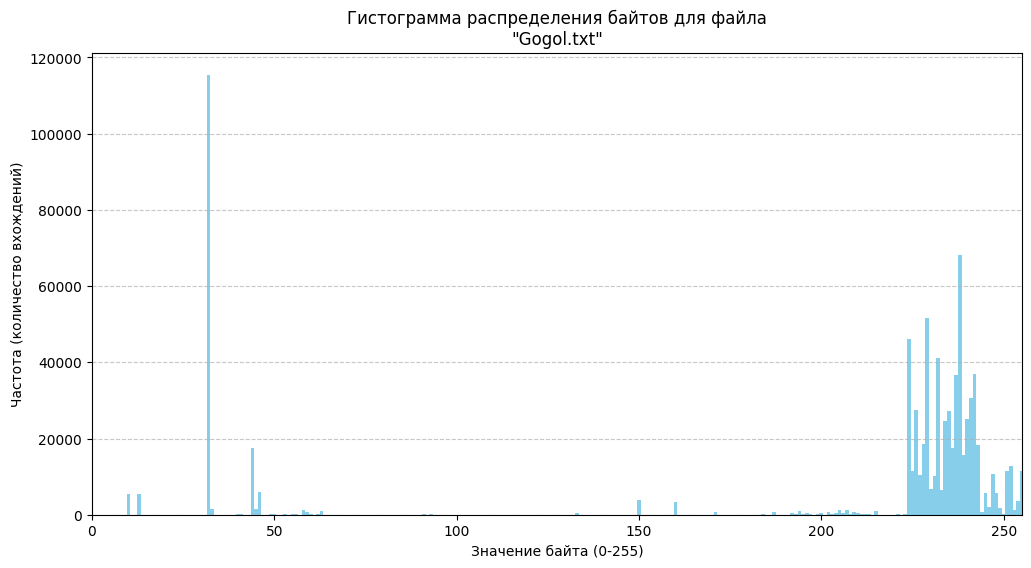

----------------------------------------
Анализ файла: RT.bmp
Размер файла: 1,057.17 Кбайт
Энтропия файла: 7.7355 бит/байт
Полная энтропия: 8,373,921 бит
Теоретический минимальный размер: 1,022.21 Кбайт
----------------------------------------


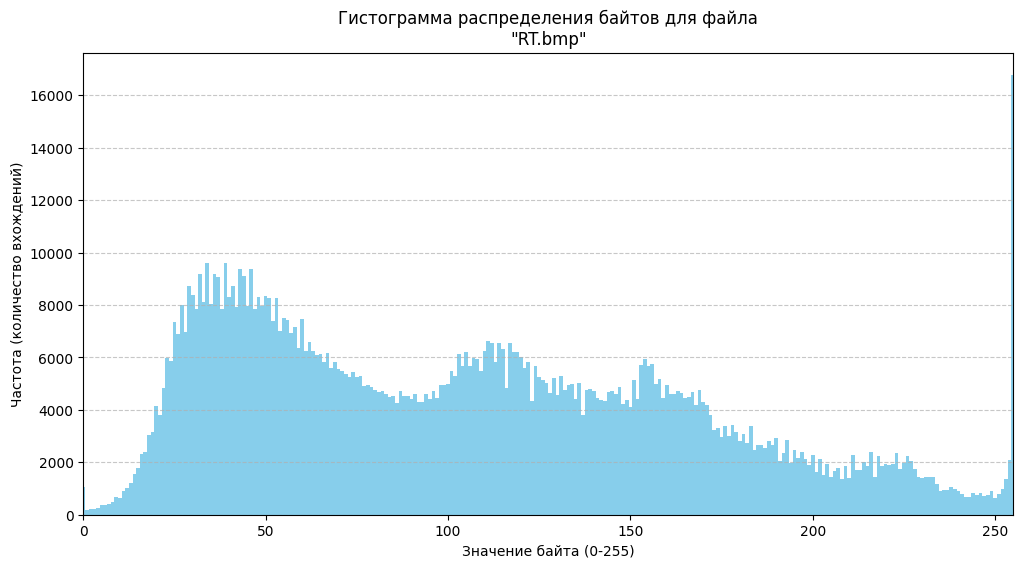

In [1]:
import math
import sys
import os
import matplotlib.pyplot as plt

def analyze_file(file_path):
    with open(file_path, 'rb') as f:
        byte_counts = [0] * 256
        file_size = 0
        chunk = f.read(4096)
        
        while chunk:
            for byte in chunk:
                byte_counts[byte] += 1
            file_size += len(chunk)
            chunk = f.read(4096)
    return byte_counts, file_size

def calculate_entropy(byte_counts, file_size):
    if file_size == 0:
        return 0.0

    entropy = 0.0
    for count in byte_counts:
        if count == 0:
            continue
        probability = count / file_size
        entropy -= probability * math.log2(probability)

    return entropy

def plot_histogram(byte_counts, file_path):

    byte_values = range(256)

    plt.figure(figsize=(12, 6))
    plt.bar(byte_values, byte_counts, width=1.0, color='skyblue')

    plt.title(f'Гистограмма распределения байтов для файла\n"{file_path}"')
    plt.xlabel('Значение байта (0-255)')
    plt.ylabel('Частота (количество вхождений)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(0, 255)
    plt.show()


for file_path in ["Gogol.txt", 'RT.bmp']:

    analysis_result = analyze_file(file_path)

    if analysis_result:
        byte_counts, file_size = analysis_result
        entropy_value = calculate_entropy(byte_counts, file_size)

        total_entropy = entropy_value * file_size

        print("-" * 40)
        print(f"Анализ файла: {file_path}")
        print(f"Размер файла: {file_size/1024:,.2f} Кбайт")
        print(f"Энтропия файла: {entropy_value:.4f} бит/байт")
        print(f"Полная энтропия: {total_entropy:,.0f} бит")
        print(f"Теоретический минимальный размер: {total_entropy/8/1024:,.2f} Кбайт")
        print("-" * 40)

        plot_histogram(byte_counts, file_path)

Видно, что они байты распределены не равномерно, хотя у bmp-изображения значение близко к 8 бит/байт. \
Далее создадим файл со случайными данными (воспользуемся функцией, берущей за основу для генерации случайных чисел данные ОС, например такие, как движение мыши или шумы аппаратных устройств, что должно дать высокую энтропию).

In [2]:
def create_high_entropy_file(file_path, size_mb):
    size_bytes = size_mb * 1024 * 1024
        
    print(f"Генерация {size_mb} МБ случайных данных...")

    random_data = os.urandom(size_bytes)
        
    print(f"Запись данных в файл: '{file_path}'...")

    with open(file_path, 'wb') as f:
        f.write(random_data)
            
    print("-" * 40)
    print(f"Файл '{file_path}' размером {size_mb} МБ создан")
    print("-" * 40)

create_high_entropy_file("high_H.txt", 5)


Генерация 5 МБ случайных данных...
Запись данных в файл: 'high_H.txt'...
----------------------------------------
Файл 'high_H.txt' размером 5 МБ создан
----------------------------------------


----------------------------------------
Анализ файла: high_H.txt
Размер файла: 5,120.00 Кбайт
Энтропия файла: 8.0000 бит/байт
Полная энтропия: 41,942,821 бит
Теоретический минимальный размер: 5,119.97 Кбайт
----------------------------------------


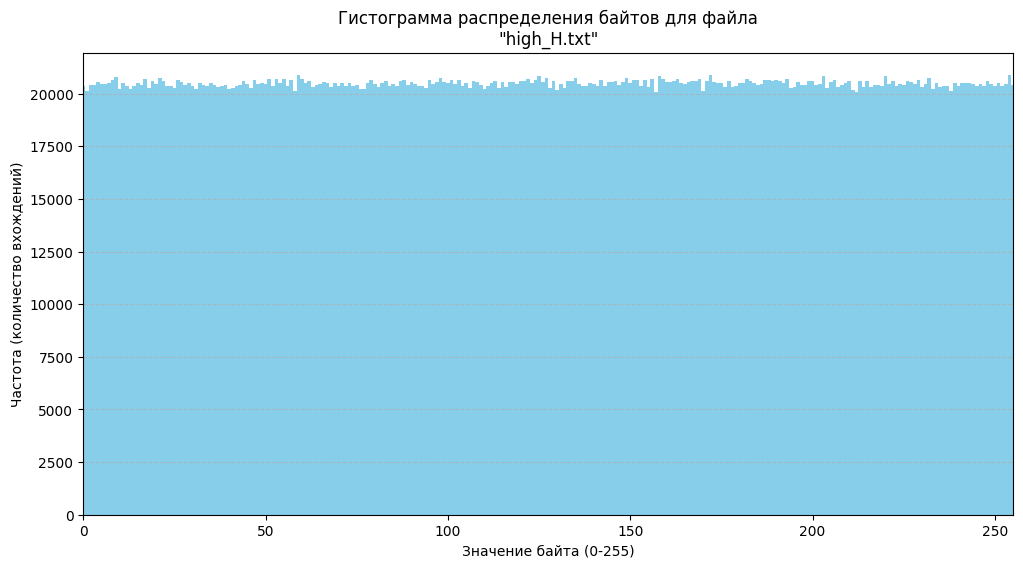

In [3]:
file_path = "high_H.txt"
analysis_result = analyze_file(file_path)

if analysis_result:
    byte_counts, file_size = analysis_result
    entropy_value = calculate_entropy(byte_counts, file_size)

    total_entropy = entropy_value * file_size

    print("-" * 40)
    print(f"Анализ файла: {file_path}")
    print(f"Размер файла: {file_size/1024:,.2f} Кбайт")
    print(f"Энтропия файла: {entropy_value:.4f} бит/байт")
    print(f"Полная энтропия: {total_entropy:,.0f} бит")
    print(f"Теоретический минимальный размер: {total_entropy/8/1024:,.2f} Кбайт")
    print("-" * 40)

    plot_histogram(byte_counts, file_path)

Сожмем теперь файлы при помощи ZIP и посмотрим, что получилось.

----------------------------------------
Анализ файла: Gogol.zip
Размер файла: 314.55 Кбайт
Энтропия файла: 7.9978 бит/байт
Полная энтропия: 2,576,073 бит
Теоретический минимальный размер: 314.46 Кбайт
----------------------------------------


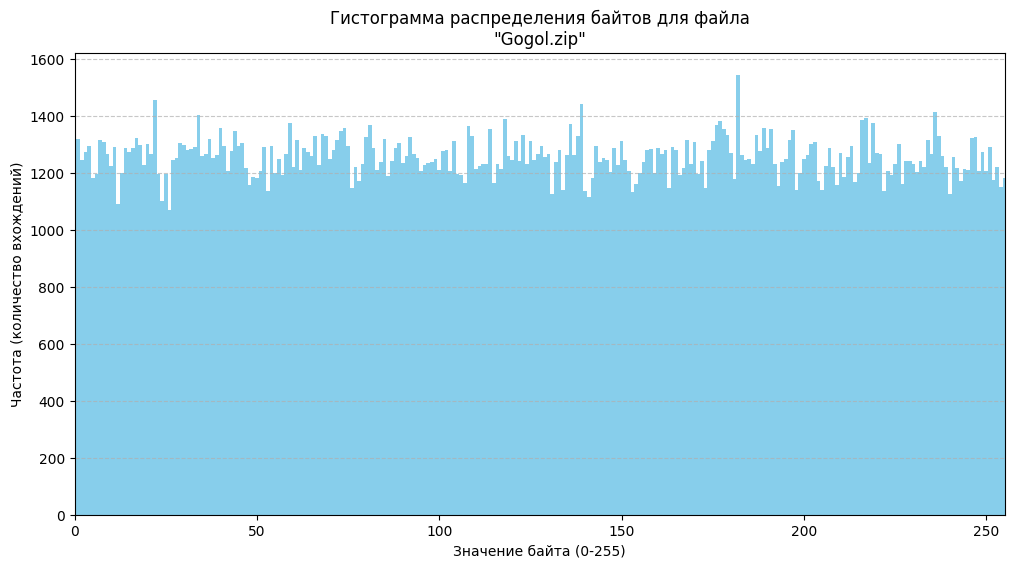

----------------------------------------
Анализ файла: RT.zip
Размер файла: 696.16 Кбайт
Энтропия файла: 7.9949 бит/байт
Полная энтропия: 5,699,339 бит
Теоретический минимальный размер: 695.72 Кбайт
----------------------------------------


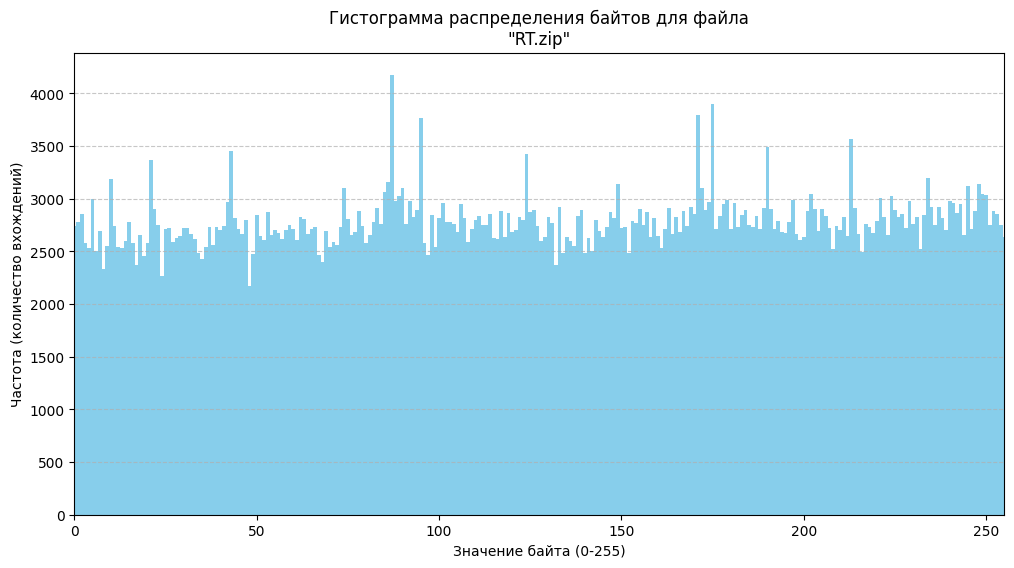

----------------------------------------
Анализ файла: high_H.zip
Размер файла: 5,126.04 Кбайт
Энтропия файла: 7.9999 бит/байт
Полная энтропия: 41,992,277 бит
Теоретический минимальный размер: 5,126.01 Кбайт
----------------------------------------


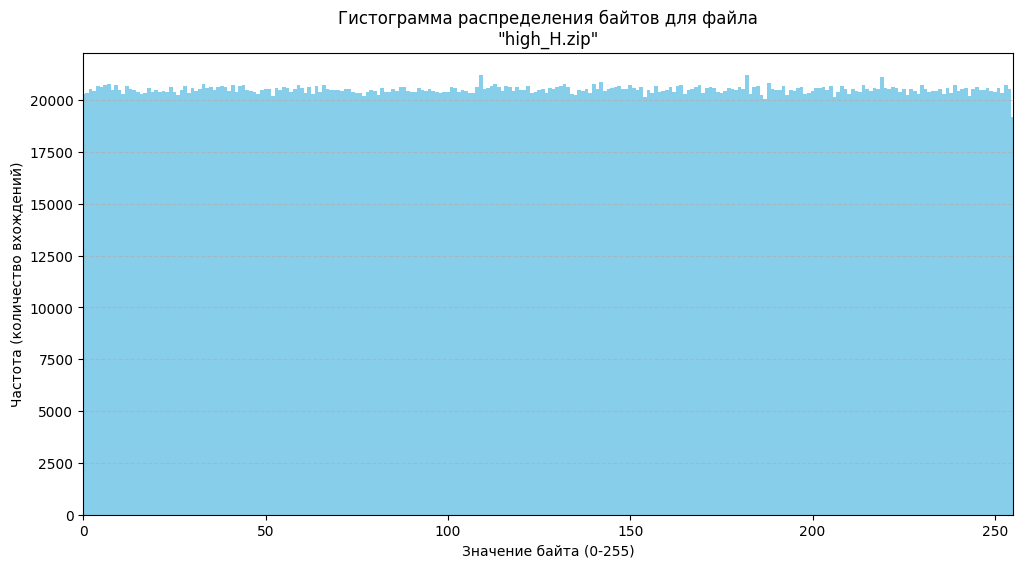

In [4]:
for file_path in ["Gogol.zip", 'RT.zip', 'high_H.zip']:

    analysis_result = analyze_file(file_path)

    if analysis_result:
        byte_counts, file_size = analysis_result
        entropy_value = calculate_entropy(byte_counts, file_size)

        total_entropy = entropy_value * file_size

        print("-" * 40)
        print(f"Анализ файла: {file_path}")
        print(f"Размер файла: {file_size/1024:,.2f} Кбайт")
        print(f"Энтропия файла: {entropy_value:.4f} бит/байт")
        print(f"Полная энтропия: {total_entropy:,.0f} бит")
        print(f"Теоретический минимальный размер: {total_entropy/8/1024:,.2f} Кбайт")
        print("-" * 40)

        plot_histogram(byte_counts, file_path)

Видно, что везде энтропия на байт данных стала почти 8 бит, а сам размер файла сильно сократился. Заметим, что в некоторых местах размер сократился до меньшего значения, чем теоретическое, однако это объясняется тем, что современные программы для сжатия ищут не просто повторяющиеся байты, а повторяющиеся последовательности байтов и заменяют их короткими ссылками.


| Имя файла | Тип содержимого | Исходный размер (байт) | Энтропия (бит/байт) | Теоретический мин. размер (байт) | Размер после сжатия (байт) |
|:------------------|:-----------------|:-----------------------|:--------------------|:-----------------------------------|:-------------------------------|
| `Gogol.txt` | Текст (книга) | 756.59 K | 4.76 | 450 K | 345.88 K | 
| `RT.bmp` | Изображение (несжатое) | 1 057 K | 7.74 | 1 022 K | 696.16 K | 
| `high_H.txt` | Случайные данные | 5 120 K | 8.00 | 5 119.98 K | 5 126.04 K | 


## Выводы:
В данной лабораторной работе мы исследовали влияние сжатия на энтропию файла, выяснив, что энтропия на байт приближается к 8 бит, при этом общая энтропия остается прежней, либо сокращается за счет замены архиватором целых повторяющихся последовательностей байт. Также если наблюдать за гистограммами распределения байтов (их частотами вхождения), то при сжатии они приближаются к прямоугольникам, т.е. распределение стремится к равномерному. 